In [427]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [428]:
df = pd.read_csv("cereal.csv",sep=";")

In [429]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


In [430]:
df = df.iloc[1:]
df.drop(["name"],axis=1,inplace=True)

In [431]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [460]:
df = df.astype({'calories':'float', 'protein':'float', 'fat':'float', 'sodium':'float', 'fiber':'float', 'carbo':'float',
       'sugars':'float', 'potass':'float', 'vitamins':'float', 'shelf':'float', 'weight':'float', 'cups':'float', 'rating':'float'})
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,sodium2,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
1,70.000,4.000,1.000,130.000,10.000,5.000,6.000,280.000,25.000,3.000,...,257.999,0,0,0,1,0,0,0,1,0
2,120.000,3.000,5.000,15.000,2.000,8.000,8.000,135.000,0.000,3.000,...,27.347,0,0,0,0,0,1,0,1,0
3,70.000,4.000,1.000,260.000,9.000,7.000,5.000,320.000,25.000,3.000,...,520.468,0,0,1,0,0,0,0,1,0
4,50.000,4.000,0.000,140.000,14.000,8.000,0.000,330.000,25.000,3.000,...,280.786,0,0,1,0,0,0,0,1,0
5,110.000,2.000,2.000,200.000,1.000,14.000,8.000,-1.000,25.000,3.000,...,399.224,0,0,0,0,0,0,1,1,0


In [433]:
df['sodium2'] = df['sodium'].apply(lambda x:float(x*2) + np.random.normal(0,5,1))
df['sodium2'] = df['sodium2'].astype("float")

In [434]:
columns = df.columns
columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'sodium2'],
      dtype='object')

In [435]:
df = pd.get_dummies(df, columns=['mfr','type'])
df.dropna(inplace=True)

In [436]:
X = df.drop(["rating"],axis=1,inplace=False)
y = df[["rating"]]

In [437]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X[['calories', 'protein', 'fat', 'sodium','sodium2','fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']] = scaler.fit_transform(
    X[['calories', 'protein', 'fat', 'sodium','sodium2','fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']])

In [336]:
X.shape

(77, 22)

In [337]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [338]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

linear_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)
elasticnet_model.fit(X_train,y_train)


ElasticNet()

In [339]:
linear_model.score(X_test,y_test)

0.9999999999999993

In [340]:
lasso_model.score(X_test,y_test)

0.5174355596018481

In [341]:
ridge_model.score(X_test,y_test)

0.8853665913978609

In [342]:
elasticnet_model.score(X_test,y_test)

0.3141443823614669

In [457]:
from sklearn.pipeline import Pipeline

ridge_model = GridSearchCV(Ridge(),{'alpha':[0.0001,0.0005,0.005,0.001,0.01,0.05,0.1,0.2,0.5,1]},
                         cv=5, scoring='r2')

In [458]:
ridge_model.fit(X,y)
df_score = pd.DataFrame(ridge_model.cv_results_).iloc[:,4:][['param_alpha','mean_test_score']]

Text(0, 0.5, 'R2')

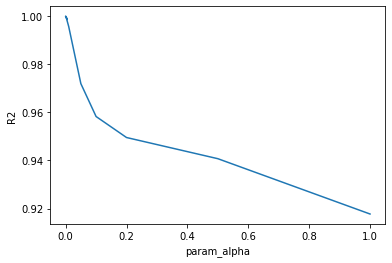

In [459]:
plt.plot(df_score['param_alpha'],df_score['mean_test_score'])
plt.xlabel("param_alpha")
plt.ylabel("R2")

# 3.3 Normal Equations

In [154]:
theta = np.dot(np.linalg.inv(np.dot(X_train, X_train.T)), np.dot(X_train, y_train.T))

In [155]:
theta

array([[193273.24739475],
       [519310.39717892],
       [-54050.25770387]])

In [159]:
np.dot(theta.T,np.array([1,1650,3]))

array([8.56893278e+08])

In [ ]:
np.random.rand()